# Beamline

This is an example of plotting lines and surveys.
First, create a simple line and a tracker:

In [1]:
import xtrack as xt
import xpart as xp
import xplt
import numpy as np

np.random.seed(36963142)

In [ ]:
## Generate a simple 6-fold symmetric FODO lattice
n = 6
elements = []
element_names = []
for i in range(n):
    element_names.extend(
        [
            f"drift{i}1",
            f"S{i}QF",
            f"drift{i}2",
            f"S{i}MUA",
            f"drift{i}3",
            f"S{i}SX",
            f"drift{i}4",
            f"S{i}QD",
            f"drift{i}5",
            f"S{i}MUB",
            f"drift{i}6",
        ][:: -1 if i % 2 else 1]
    )
    elements.extend(
        [
            xt.Drift(length=0.7),
            xt.Multipole(length=0.3, knl=[0, +0.63], ksl=[0, 0]),
            xt.Drift(length=0.7),
            xt.Multipole(
                length=0.5, knl=[np.pi / n], hxl=[np.random.choice([-1, +1]) * np.pi / n]
            ),
            xt.Drift(length=0.4),
            xt.Multipole(length=0.2, knl=[0, 0, 0.5 * np.sin(2 * np.pi * (i / n))]),
            xt.Drift(length=0.3),
            xt.Multipole(length=0.3, knl=[0, -0.48], ksl=[0, 0]),  # -0.4
            xt.Drift(length=0.7),
            xt.Multipole(
                length=0.5, knl=[np.pi / n], hxl=[np.random.choice([-1, +1]) * np.pi / n]
            ),
            xt.Drift(length=2.2),
        ][:: -1 if i % 2 else 1]
    )
elements.append(xt.LimitRect(min_x=-0.01, max_x=0.01, min_y=-np.inf, max_y=np.inf))
element_names.append("APERTURE")
line = xt.Line(elements=elements, element_names=element_names)

line.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=1e9)
tracker = xt.Tracker(line=line)

## Survey

Create a survey for a floor plan:

In [3]:
survey = tracker.survey()

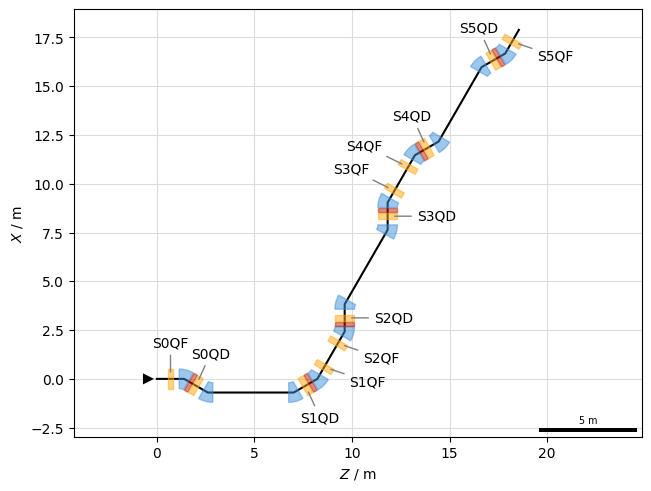

In [4]:
plot = xplt.FloorPlot(survey, line, labels="S.Q.")
plot.add_scale()

## Multipole strength

A plot of the multipole strength $k_nl$ as function of s-coordinate:

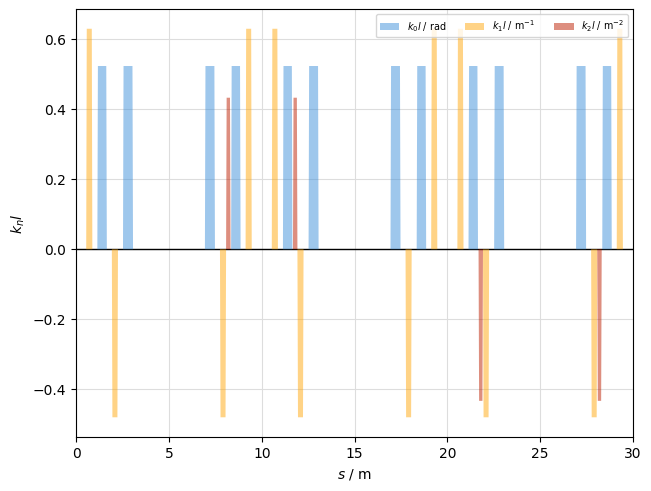

In [5]:
plot = xplt.KnlPlot(line)

-----------------
```{seealso}
- {class}`xplt.line`
```